## Imports

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('Set3')

import warnings
warnings.filterwarnings("ignore")

import folium

## Load The Data

In [6]:
df_2015 = pd.read_csv('./archive/2015.csv')
df_2016 = pd.read_csv('./archive/2016.csv')
df_2017 = pd.read_csv('./archive/2017.csv')
df_2018 = pd.read_csv('./archive/2018.csv')
df_2019 = pd.read_csv('./archive/2019.csv')

In [7]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [9]:
for df in [df_2015, df_2016, df_2017, df_2018, df_2019]:
    print(len(df.columns))

12
13
12
9
9


In [13]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [10]:
df_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [11]:
df_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [14]:
#Columns to keep in 2016 DataFrame
keep_2016 = ['Country', 'Happiness Rank', 'Happiness Score',
             'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
            'Freedom', 'Trust (Government Corruption)',  'Generosity']

In [16]:
df_2016 = df_2016[keep_2016]

In [18]:
df_2015 = df_2015[keep_2016]

In [21]:
df_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [22]:
keep_2017 = ['Country', 'Happiness.Rank', 'Happiness.Score',
             'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
            'Freedom', 'Trust..Government.Corruption.',  'Generosity']

In [23]:
df_2017 = df_2017[keep_2017]

In [26]:
#rename columns of df_2017 to have same names in all dataframes

df_2017.columns = keep_2016

In [29]:
print(df_2019.columns)
print(df_2018.columns)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [30]:
#renaming old dataframes to have the same titles as more recent one

rename_dict = {
    'Happiness Rank' : 'Overall rank',
    'Country' : 'Country or region',
    'Happiness Score' : 'Score',
    'Economy (GDP per Capita)' : 'GDP per capita',
    'Family' : 'Social support',
    'Health (Life Expectancy)' : 'Healthy life expectancy',
    'Freedom' : 'Freedom to make life choices',
    'Trust (Government Corruption)' : 'Perceptions of corruption',
}

In [31]:
for df in [df_2015, df_2016, df_2017]:
    df.rename(columns = rename_dict, inplace = True)

In [33]:
df_2015.columns

Index(['Country or region', 'Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption',
       'Generosity'],
      dtype='object')

In [36]:
#Add a Year column to all dataframes
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

In [37]:
#Concatenate All Dataframes together

data = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], axis = 0)

In [38]:
data.head()

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             782 non-null    object 
 1   Overall rank                  782 non-null    int64  
 2   Score                         782 non-null    float64
 3   GDP per capita                782 non-null    float64
 4   Social support                782 non-null    float64
 5   Healthy life expectancy       782 non-null    float64
 6   Freedom to make life choices  782 non-null    float64
 7   Perceptions of corruption     781 non-null    float64
 8   Generosity                    782 non-null    float64
 9   Year                          782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 67.2+ KB


Handling Missing Values

In [41]:
data.isna().sum()

Country or region               0
Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Perceptions of corruption       1
Generosity                      0
Year                            0
dtype: int64

We have only 1 missing cell in the "Perceptions of corruption" column, so we will drop it.

In [42]:
data.dropna(axis = 0, inplace = True)

In [44]:
#Check again if there is missing data
data.isna().sum().sum()

0

## Getting familiar with the data

In [45]:
data.shape

(781, 10)

In [46]:
#Group data by 'Year', and display statistics for the happiness score
data.groupby('Year')['Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,158.0,5.375734,1.145010,2.839,4.5260,5.2325,6.24375,7.587
2016,157.0,5.382185,1.141674,2.905,4.4040,5.3140,6.26900,7.526
2017,155.0,5.354019,1.131230,2.693,4.5055,5.2790,6.10150,7.537
2018,155.0,5.366897,1.117433,2.905,4.4515,5.3580,6.15400,7.632
2019,156.0,5.407096,1.113120,2.853,4.5445,5.3795,6.18450,7.769


In [59]:
#Create a new dataframe that contains the average value for each of the seven factors that contribute to happiness, for each year
grouped = data.groupby('Year')[['Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].mean().reset_index()
grouped.head()

,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2015,5.375734,0.846137,0.991046,0.630259,0.428615,0.237296,0.143422
1,2016,5.382185,0.953880,0.793621,0.557619,0.370994,0.242635,0.137624
2,2017,5.354019,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120
3,2018,5.366897,0.883677,1.216058,0.596877,0.455606,0.180974,0.112000
4,2019,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603


In [60]:
#Unpivot the dataframe to have only three columns : Year, Factor, and Avg_value
grouped = pd.melt(frame = grouped, id_vars = 'Year', 
                  value_vars = ['Score', 'GDP per capita',
                   'Social support', 'Healthy life expectancy',
                   'Freedom to make life choices', 'Generosity',
                   'Perceptions of corruption'],
                  var_name='Factor', value_name='Avg_value')

In [61]:
grouped.head(10)

,Year,Factor,Avg_value
0,2015,Score,5.375734
1,2016,Score,5.382185
2,2017,Score,5.354019
3,2018,Score,5.366897
4,2019,Score,5.407096
5,2015,GDP per capita,0.846137
6,2016,GDP per capita,0.953880
7,2017,GDP per capita,0.984718
8,2018,GDP per capita,0.883677
9,2019,GDP per capita,0.905147


In [65]:
set(grouped['Factor'].values)

{'Freedom to make life choices',
 'GDP per capita',
 'Generosity',
 'Healthy life expectancy',
 'Perceptions of corruption',
 'Score',
 'Social support'}

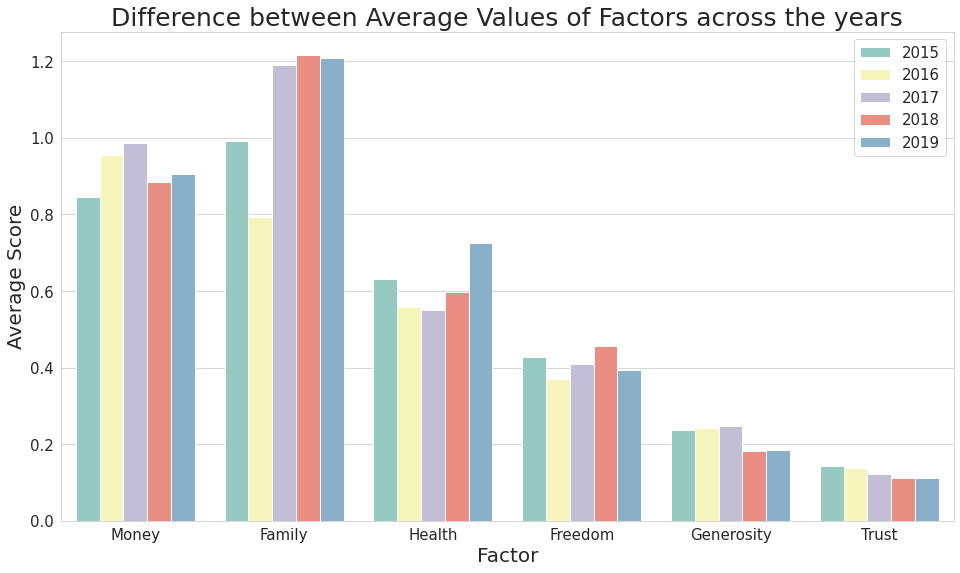

In [74]:
plt.figure(figsize = (16,9))

ax = sns.barplot(x = grouped[grouped['Factor'] != 'Score']['Factor'],
                 y = grouped['Avg_value'], 
                 hue = grouped['Year'])

plt.title("Difference between Average Values of Factors across the years", fontsize = 25)
plt.xlabel("Factor", fontsize = 20)
plt.ylabel("Average Score", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

ax.set_xticklabels(['Money', 'Family', 'Health', 'Freedom', 'Generosity', 'Trust']);

## Which are the happiest people in 2019?

In [83]:
happiest_10_countries = data.loc[data['Year'] == 2019, ['Country or region','Score']].sort_values(by = 'Score', ascending  = False).head(10)

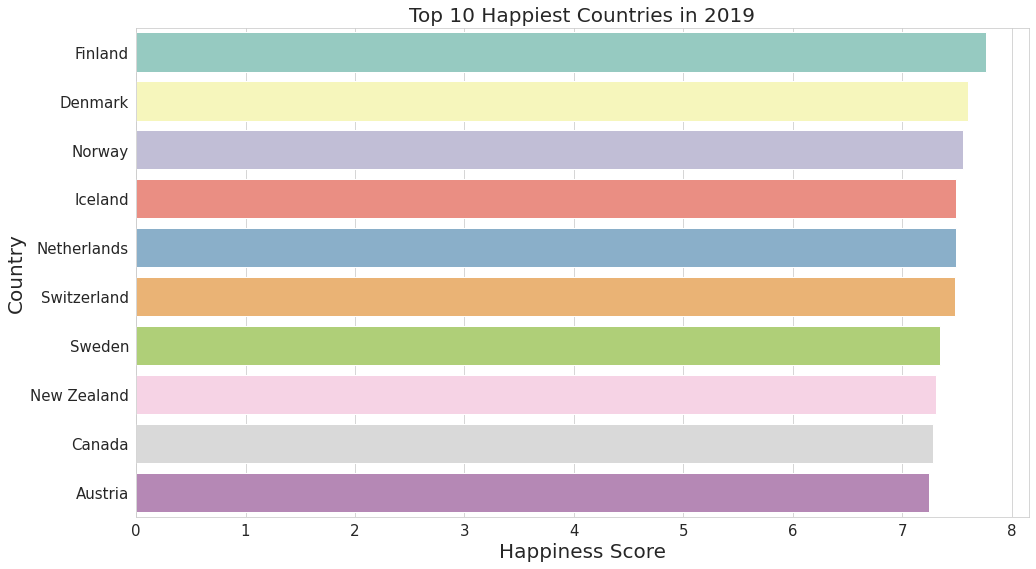

In [87]:
plt.figure(figsize = (16,9))
sns.barplot(x = happiest_10_countries['Score'],
            y = happiest_10_countries['Country or region'])

plt.title("Top 10 Happiest Countries in 2019", fontsize = 20)
plt.xlabel("Happiness Score", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

## Which are the least happy people in 2019?

In [88]:
least_happy_countries = data.loc[data['Year'] == 2019, ['Country or region','Score']].sort_values(by = 'Score', ascending  = True).head(10)

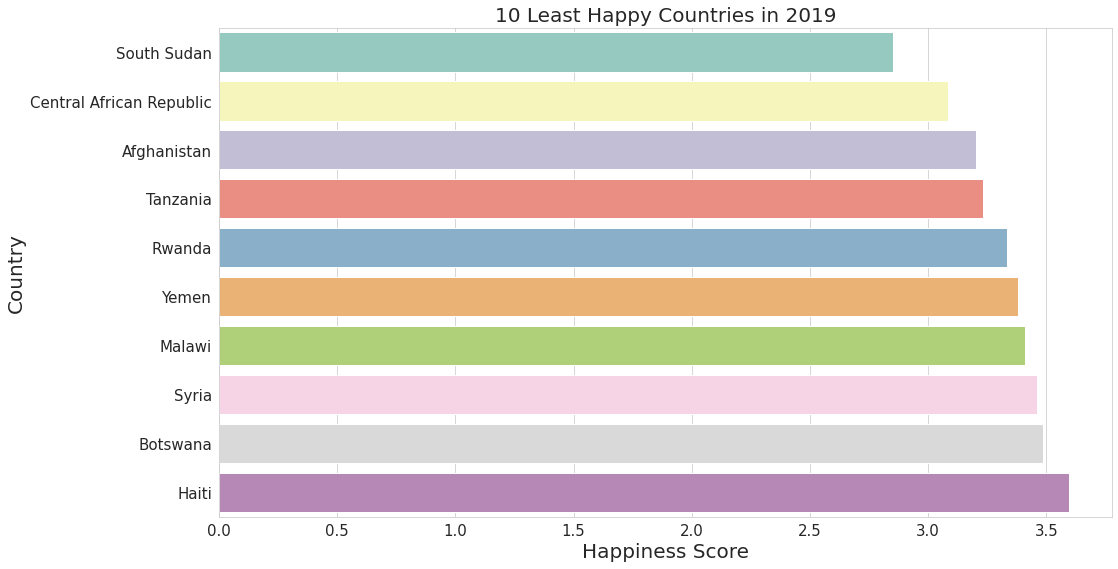

In [89]:
plt.figure(figsize = (16,9))
sns.barplot(x = least_happy_countries['Score'],
            y = least_happy_countries['Country or region'])

plt.title("10 Least Happy Countries in 2019", fontsize = 20)
plt.xlabel("Happiness Score", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

## Happiness Distribution in 2019

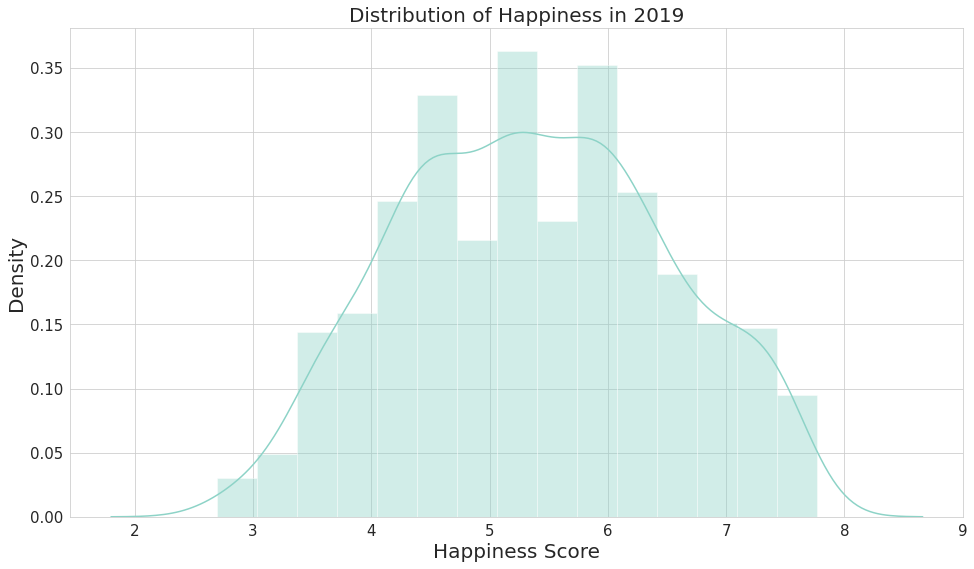

In [93]:
plt.figure(figsize = (16,9))
sns.distplot(a = data['Score'], bins = 15, kde = True)

plt.title('Distribution of Happiness in 2019', fontsize = 20)
plt.xlabel('Happiness Score', fontsize = 20)
plt.ylabel('Density', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

* The distribution has less kurtosis than a Normal Distribution (Platykurtic)

## Distribution of The Factors of Happiness in 2019

In [112]:
#Create a new dataframe that contains the average value for each of the seven factors that contribute to happiness, for each year
factors_avg = data[data['Year'] == 2019].groupby('Country or region')[['GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].mean().reset_index()
factors_avg.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,0.350,0.517,0.361,0.000,0.158,0.025
1,Albania,0.947,0.848,0.874,0.383,0.178,0.027
2,Algeria,1.002,1.160,0.785,0.086,0.073,0.114
3,Argentina,1.092,1.432,0.881,0.471,0.066,0.050
4,Armenia,0.850,1.055,0.815,0.283,0.095,0.064


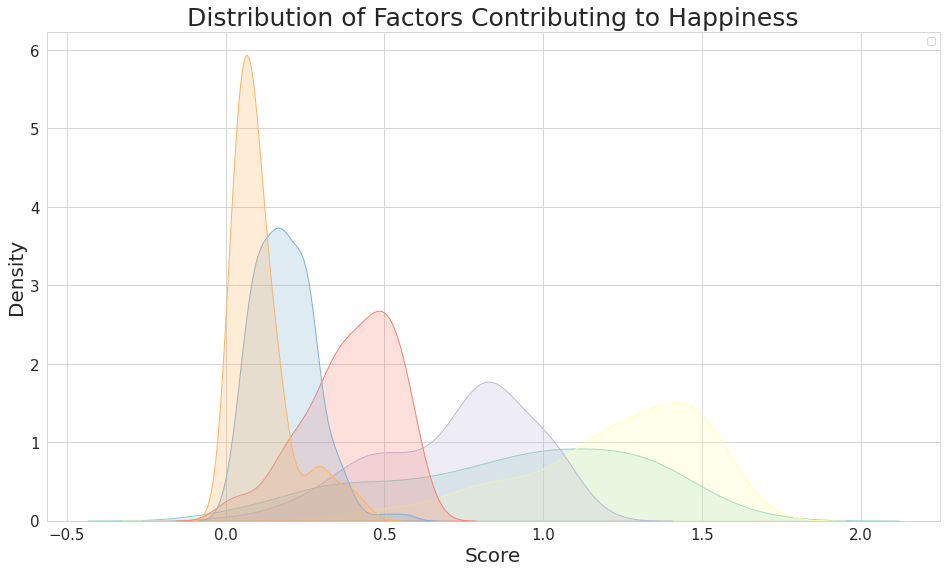

In [118]:
plt.figure(figsize = (16,9))

GDP = sns.kdeplot(data = factors_avg['GDP per capita'], shade = True)
ssupport = sns.kdeplot(data = factors_avg['Social support'], shade = True)
hle = sns.kdeplot(data = factors_avg['Healthy life expectancy'], shade = True)
freedom = sns.kdeplot(data = factors_avg['Freedom to make life choices'], shade = True)
generosity = sns.kdeplot(data = factors_avg['Generosity'], shade = True)
corruption = sns.kdeplot(data = factors_avg['Perceptions of corruption'], shade = True)

plt.title("Distribution of Factors Contributing to Happiness", fontsize = 25)
plt.xlabel('Score', fontsize = 20)
plt.ylabel('Density', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend((GDP, ssupport, hle, freedom, generosity, corruption), 
           ('GDP per capita','Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'));

## What Influences Happiness?

In [136]:
corr = data.corr()
corr

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
Overall rank,1.000000,-0.992053,-0.795110,-0.647420,-0.744099,-0.540151,-0.372781,-0.118290,-0.006594
Score,-0.992053,1.000000,0.789719,0.651246,0.742843,0.553365,0.398418,0.138142,0.005946
GDP per capita,-0.795110,0.789719,1.000000,0.592889,0.787752,0.345615,0.306307,-0.013646,0.017230
Social support,-0.647420,0.651246,0.592889,1.000000,0.573252,0.419795,0.126401,-0.037597,0.368585
Healthy life expectancy,-0.744099,0.742843,0.787752,0.573252,1.000000,0.341155,0.250512,0.010718,0.130138
Freedom to make life choices,-0.540151,0.553365,0.345615,0.419795,0.341155,1.000000,0.459593,0.290564,0.011118
Perceptions of corruption,-0.372781,0.398418,0.306307,0.126401,0.250512,0.459593,1.000000,0.318920,-0.122264
Generosity,-0.118290,0.138142,-0.013646,-0.037597,0.010718,0.290564,0.318920,1.000000,-0.192416
Year,-0.006594,0.005946,0.017230,0.368585,0.130138,0.011118,-0.122264,-0.192416,1.000000


In [123]:
#Generating a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype = np.bool))

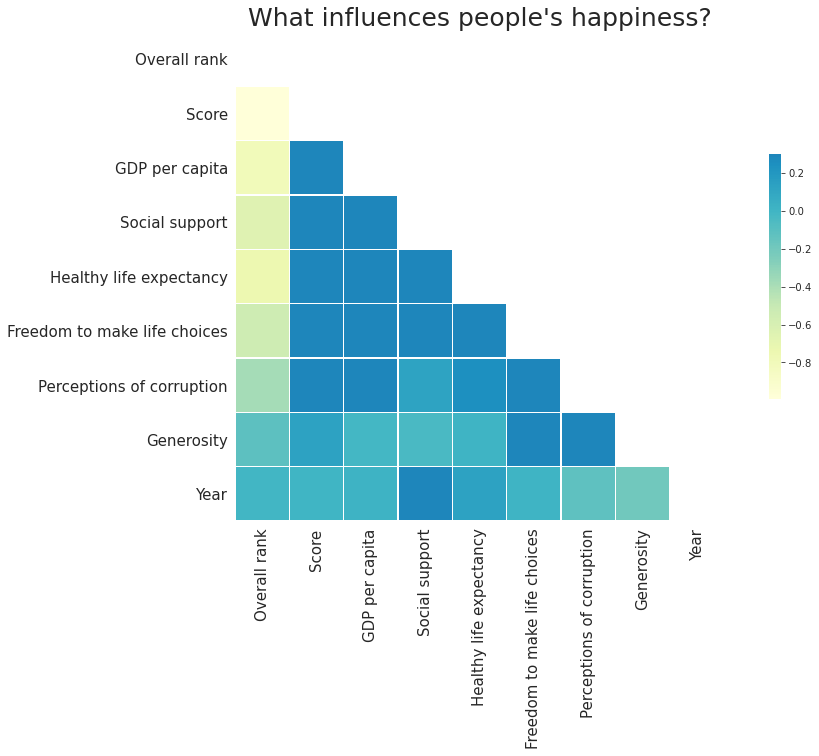

In [135]:
fig, ax = plt.subplots(figsize = (16,9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", vmax=.3, center=0,
            square=True, linewidths = 0.5, cbar_kws={"shrink": .5})

plt.title("What influences people's happiness?", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

It's evident that happiness score is highly correlated with GDP, and Health.

## World Map

In [140]:
import geopandas as gpd

In [153]:
country_geo = gpd.read_file('world-countries.json')

In [143]:
country_codes = pd.read_csv('wikipedia-iso-country-codes.csv')

In [144]:
country_codes.head()

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Zimbabwe,ZW,ZWE,716,ISO 3166-2:ZW
1,Zambia,ZM,ZMB,894,ISO 3166-2:ZM
2,Yemen,YE,YEM,887,ISO 3166-2:YE
3,Western Sahara,EH,ESH,732,ISO 3166-2:EH
4,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF


In [145]:
country_codes.rename(columns = {'English short name lower case' : 'Country or region'}, inplace = True)

In [148]:
#Create a new dataframe that contains the average value for each of the seven factors that contribute to happiness, for each year
avg_scores = data[data['Year'] == 2019].groupby('Country or region')[['Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].mean().reset_index()
avg_scores.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027
2,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114
3,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050
4,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064


In [149]:
data_to_plot = pd.merge(left = country_codes[['Country or region', 'Alpha-3 code']],
                       right = avg_scores[['Score', 'Country or region']],
                       how = 'inner', on = ['Country or region'])

In [150]:
data_to_plot.head()

,Country or region,Alpha-3 code,Score
0,Zimbabwe,ZWE,3.663
1,Zambia,ZMB,4.107
2,Yemen,YEM,3.380
3,Vietnam,VNM,5.175
4,Venezuela,VEN,4.707


In [151]:
data_to_plot.drop(labels = 'Country or region', axis = 1, inplace = True)

In [152]:
data_to_plot.head()

,Alpha-3 code,Score
0,ZWE,3.663
1,ZMB,4.107
2,YEM,3.380
3,VNM,5.175
4,VEN,4.707


In [154]:
#Creating the map using Folium Package
happiness_map = folium.Map([10, 6], zoom_start=1.49)
happiness_map.choropleth(geo_data = country_geo,
                        data = data_to_plot,
                        columns = ['Alpha-3 code', 'Score'],
                        key_on = 'feature.id',
                        fill_color = 'BuPu',
                        fill_opacity = 0.5,
                        line_opacity=0.2,
                        nan_fill_color = 'white',
                        legend_name = 'Average Happiness Indicator')

happiness_map.save('data_to_plot.html')

from IPython.display import HTML
HTML('<iframe src=data_to_plot.html width=850 height=500></iframe>')

## Building A Predictive Model

In [156]:
# Importing the libraries
from sklearn.model_selection import train_test_split # for data validation

# Models
from sklearn.linear_model import LinearRegression, BayesianRidge, LassoLars
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor

# Metrics and Grid Search
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV

In [157]:
# Creating the table
data_model = data.groupby(by= 'Country or region')['Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'].mean().reset_index()

# Creating the dependent and independent variables
y = data_model['Score']
X = data_model[['GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

# Splitting the data to avoid under/overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [158]:
# Creating a predefined function to test the models
def modelfit(model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, preds)
    print('MAE:', round(mae,4))

In [159]:
# Linear Regression

lm = LinearRegression(n_jobs = 10000)
modelfit(lm)

MAE: 0.3769


In [160]:
# Random Forest Regressor

rf = RandomForestRegressor(n_jobs = 1000)
modelfit(rf)

MAE: 0.3704


In [161]:
# XGBoost
xg = XGBRegressor(learning_rate=0.1, n_estimators=5000)
modelfit(xg)

MAE: 0.4102


In [162]:
# Decision Tree
dt = DecisionTreeRegressor()
modelfit(dt)

MAE: 0.5195


In [163]:
# Bayesian Linear Model
br = BayesianRidge(n_iter=1000, tol = 0.5)
modelfit(br)

MAE: 0.3723


In [164]:
# Lasso Lars
ls = LassoLars()
modelfit(ls)

MAE: 0.9779


In [165]:
final_model = BayesianRidge(n_iter = 10, tol = 0.1, alpha_2 = 0.1)
final_model.fit(X_train, y_train)

BayesianRidge(alpha_2=0.1, n_iter=10, tol=0.1)

#### How important are the variables?

In [168]:
# How important is each variable into predicting the overall Happiness Score?

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator=final_model, random_state=1)
perm.fit(X_test, y_test)

eli5.show_weights(estimator= perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3884 ± 0.1075,GDP per capita
0.1527 ± 0.0554,Social support
0.1069 ± 0.0420,Freedom to make life choices
0.0430 ± 0.0187,Healthy life expectancy
0.0101 ± 0.0072,Perceptions of corruption
0.0077 ± 0.0039,Generosity
